# Dataset for the Background Class

In [1]:
import numpy as np
import os
import cv2
import shutil
from PIL import Image,ImageOps 
import matplotlib.pyplot as plt

## Monochromatic background.

In [2]:
folderlocation = './data/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)
folderlocation = './data/Monochrome/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

image_iter = np.zeros([50, 50, 3])

for iter1 in range(6):
    for iter2 in range(6):
        for iter3 in range(6):
            image_iter[:,:,0] = iter1*50
            image_iter[:,:,1] = iter2*50
            image_iter[:,:,2] = iter3*50
            
            cv2.imwrite(folderlocation + "Monochrome_"+str(iter1)+str(iter2)+str(iter3)+".png", image_iter)
            

## intel image classification training set

#### Images without human and animal: 
Forest 1st 30 image, 
Glacier [0] to [5] and [28] to [58] 
Mountain [0] to [60], except [4]
Sea [0] to [21]
Buildings [0] to [59], except [14] 

#### Images without animal: 
Street 1st 60
#### Images without car as a major object: 
Street 1st 60 except [28]

10007.jpg


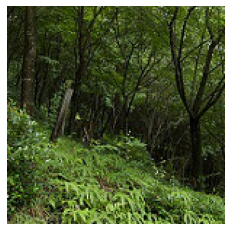

In [3]:
folderlocation = './data/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)
folderlocation = './data/Intel/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

    
PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/forest/'
filenames = next(os.walk(PATH), (None, None, []))[2] 
filenames = sorted(filenames)
print(filenames[0])
# Show the image
image = Image.open(PATH + filenames[0]) 
#plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

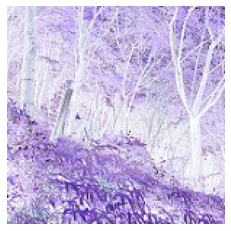

In [4]:
# Also adding inverted omage
inverted_image = ImageOps.invert(image)

plt.imshow(inverted_image)
plt.axis('off')
plt.show()

In [5]:
#Forest Class
for iter1 in range(90):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    

PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/glacier/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

# glacier class
for iter1 in range(28,58):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    
PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

# mountain class
for iter1 in range(10,40):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    
PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/sea/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

# sea class
for iter1 in range(20):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    
PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

# buildings class
for iter1 in range(10,60):
    if filenames[iter1] == '1045.jpg':
        print('1045.jpg'+ ' contains a car image')
        continue
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    
folderlocation = './data/IntelStreet/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)
    
PATH = '/kaggle/input/intel-image-classification/seg_train/seg_train/street/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

# street class
for iter1 in range(30,60):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    

1045.jpg contains a car image


## GrassClover Dataset training set
Grass. Often pictures contain small flower, high resolution, 261 images in training set. Images
[0,1,3,4,9,19,26,29] have no flower.

Example Image size:  (2835, 2855, 3)


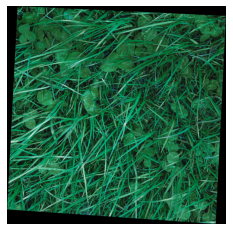

In [6]:
folderlocation = './data/Grass/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

PATH = '/kaggle/input/grassclover-dataset/biomass_data/train/images/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

img = cv2.imread(PATH + filenames[1], cv2.IMREAD_UNCHANGED)
print('Example Image size: ',img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
def inverte(imagem, name):
    imagem = (255-imagem)
    cv2.imwrite(name, imagem)

dim = (512, 512)
for iter1 in [0,1,3,4,9,19,26,29]:  
    img_count =0
    img = cv2.imread(PATH + filenames[iter1], cv2.IMREAD_UNCHANGED)
    
    # Resize and save
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(folderlocation + str(img_count) +'_'+filenames[iter1], resized)
    inverte(resized,folderlocation + str(img_count) +'_i_'+filenames[iter1])
    img_count = img_count + 1
    
    # Crop and save
    for iter2 in [100,500,900,1300,1700]:
        for iter3 in [100,500,900,1300,1700]:
            resized = img[iter2:dim[0]+iter2,iter3:dim[0]+iter3,:]
            cv2.imwrite(folderlocation + str(img_count) +'_'+filenames[iter1], resized)
            inverte(resized,folderlocation + str(img_count) +'_i_'+filenames[iter1])
            img_count = img_count + 1

## Understanding Clouds from Satellite Images Dataset training set
All images are human, animal, flower free

Example Image size:  (1400, 2100, 3)


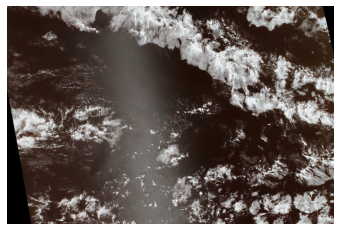

In [8]:
folderlocation = './data/space/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

PATH = '/kaggle/input/understanding_cloud_organization/train_images/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

img = cv2.imread(PATH + filenames[1], cv2.IMREAD_UNCHANGED)
print('Example Image size: ',img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
dim2 = (200, 200)
for iter1 in range(10):  
    img_count =0
    img = cv2.imread(PATH + filenames[iter1], cv2.IMREAD_UNCHANGED)
    
    # Resize and save
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(folderlocation + str(img_count) +'_' +filenames[iter1], resized)
    inverte(resized,folderlocation + str(img_count) +'_i_'+filenames[iter1])
    img_count = img_count + 1
    
    # Crop and save
    for iter2 in [100,700]:
        for iter3 in [100,700]:
            resized = img[iter2:dim[0]+iter2,iter3:dim[0]+iter3,:]
            cv2.imwrite(folderlocation + str(img_count) +'_'+filenames[iter1], resized)
            inverte(resized,folderlocation + str(img_count) +'_i_'+filenames[iter1])
            img_count = img_count + 1
            
    # Smaller images
    for iter2 in [100,300,500,700]:
        for iter3 in [100,300,500,700]:
            resized = img[iter2:dim2[0]+iter2,iter3:dim2[0]+iter3,:]
            cv2.imwrite(folderlocation + str(img_count) +'_'+filenames[iter1], resized)
            inverte(resized,folderlocation + str(img_count) +'_i_'+filenames[iter1])
            img_count = img_count + 1

## Satellite Images of Water Bodies

Example Image size:  (253, 252, 3)


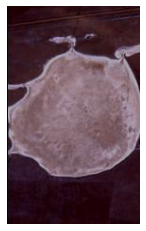

In [10]:
folderlocation = './data/space/'

PATH = '/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

img = cv2.imread(PATH + filenames[1], cv2.IMREAD_UNCHANGED)
print('Example Image size: ',img.shape)

for iter1 in range(300):
    shutil.copyfile(PATH + filenames[iter1], folderlocation + 'Water'+ filenames[iter1])
    img = cv2.imread(PATH + filenames[iter1], cv2.IMREAD_UNCHANGED)
    inverte(img,folderlocation +'Water_i_'+filenames[iter1])

plt.imshow(img)
plt.axis('off')
plt.show()

## Galaxy Zoo 2: Images

Example Image size:  (424, 424, 3)


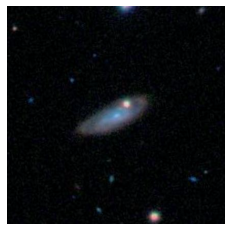

In [11]:
folderlocation = './data/space/'

PATH = '/kaggle/input/galaxy-zoo-2-images/images_gz2/images/'
filenames = next(os.walk(PATH), (None, None, []))[2]  
filenames = sorted(filenames)

img = cv2.imread(PATH + filenames[1], cv2.IMREAD_UNCHANGED)
print('Example Image size: ',img.shape)

for iter1 in range(300):
    shutil.copyfile(PATH + filenames[iter1], folderlocation + 'Galaxy'+filenames[iter1])
    img = cv2.imread(PATH + filenames[iter1], cv2.IMREAD_UNCHANGED)
    inverte(img,folderlocation +'Galaxy_i_'+filenames[iter1])
    
plt.imshow(img)
plt.axis('off')
plt.show()

# Wood texture samples
Background may contain wooden furniture

In [12]:
PATH = '/kaggle/input/wood-samples/images/images/'
filenames = next(os.walk(PATH), (None, None, []))[2] 

folderlocation = './data/wood/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

for iter1 in range(200):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])
    img = cv2.imread(PATH + filenames[iter1], cv2.IMREAD_UNCHANGED)
    inverte(img,folderlocation +'_i_'+filenames[iter1])

# Furniture Images Dataset

In [13]:
PATH = '/kaggle/input/furniture-images-dataset/furniture_images/furniture_images/'
filenames = next(os.walk(PATH), (None, None, []))[2] 
filenames = sorted(filenames)

folderlocation = './data/furniture/'
if not os.path.exists(folderlocation):
    os.mkdir(folderlocation)

for iter1 in range(100):
    shutil.copyfile(PATH + filenames[iter1], folderlocation +filenames[iter1])

In [14]:
shutil.make_archive('Background_data', 'zip', './data/')
shutil.rmtree('./data/')